# Continuous distributions

In this notebook, $F(x)$ is the CDF and $F^\prime(x) = f(x)$ is the PDF.

In [1]:
library(ggplot2)
library(patchwork)

In [2]:
set.seed(42)

## Uniform

### PDF

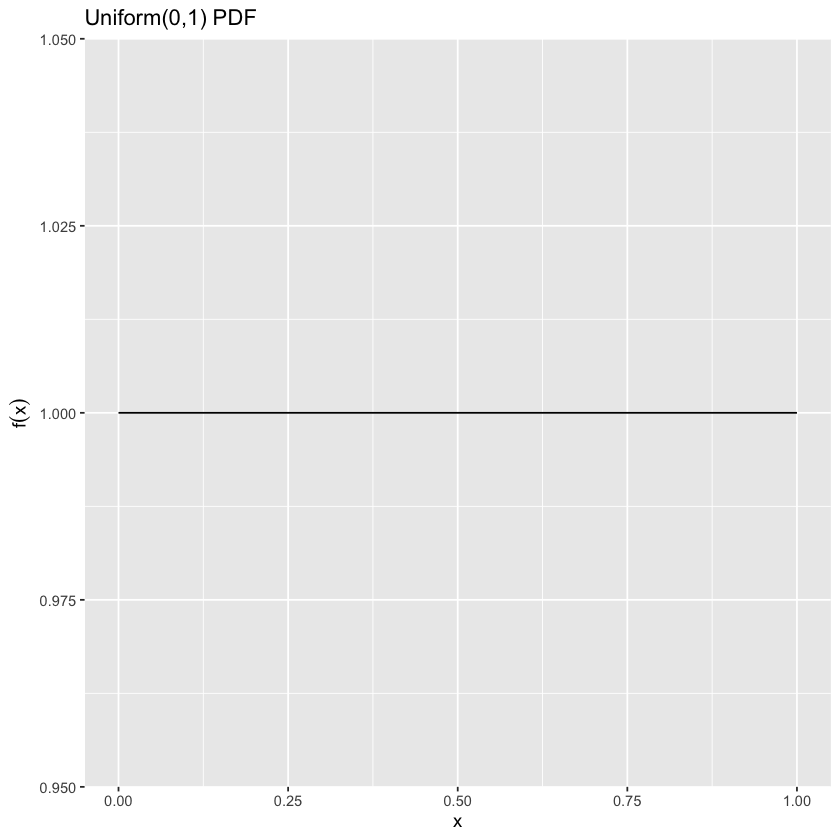

In [3]:
x <- seq(0, 1, length=100)
df <- data.frame(x = x)

ggplot(df, aes(x = x)) +
  stat_function(fun = dunif) +
  labs(
    title = "Uniform(0,1) PDF",
    y     = expression(f(x))
  )

### CDF

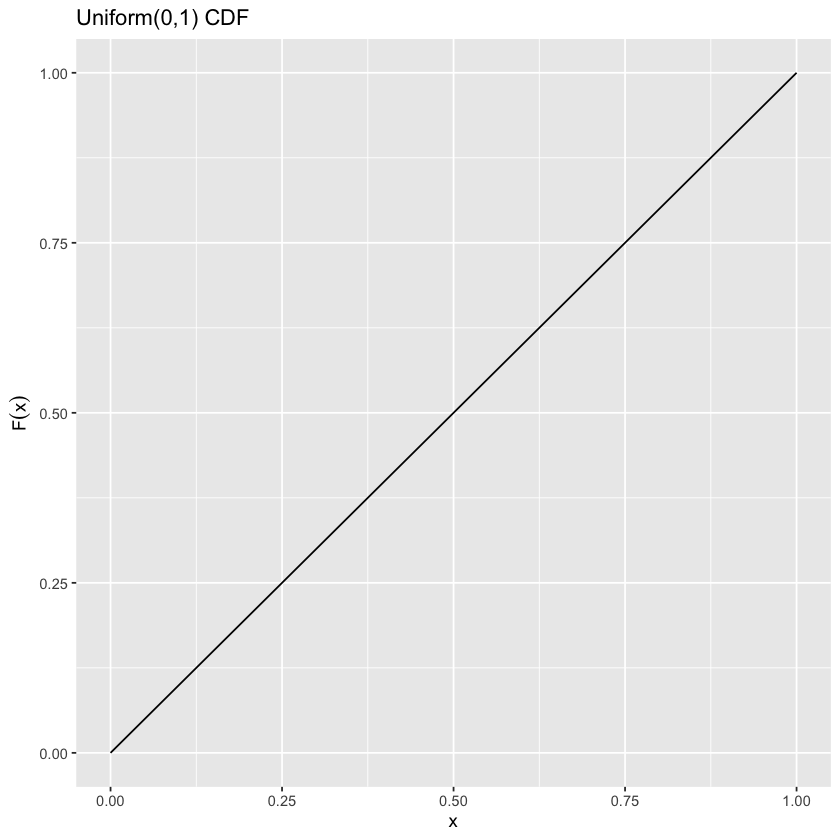

In [4]:
ggplot(df, aes(x = x)) +
  stat_function(fun = punif) +
  labs(
    title = "Uniform(0,1) CDF",
    y     = expression(F(x))
  )

### Simulation

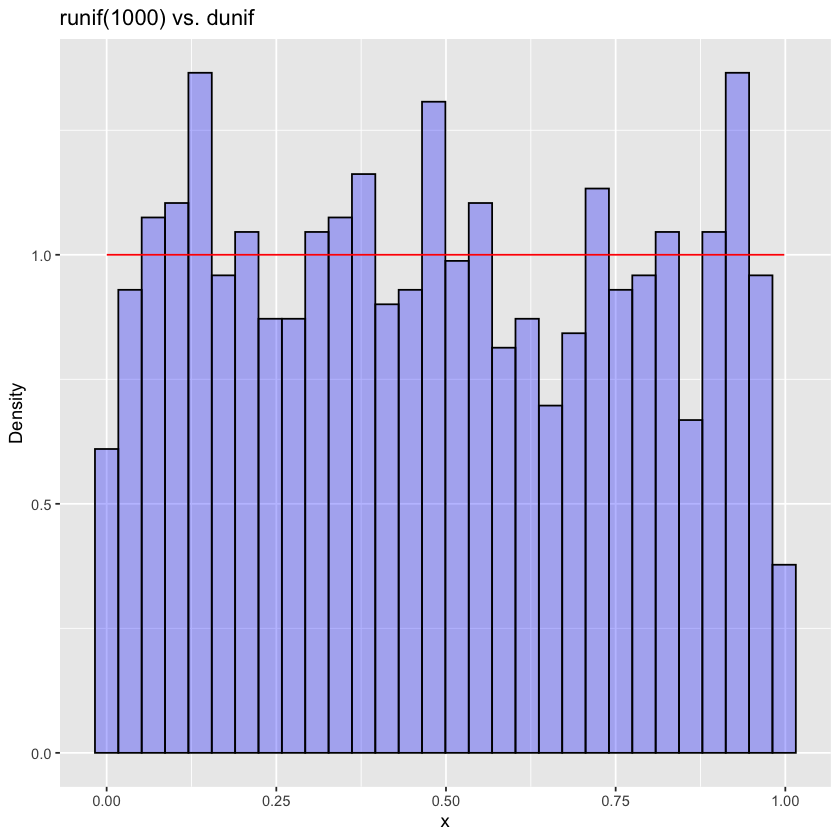

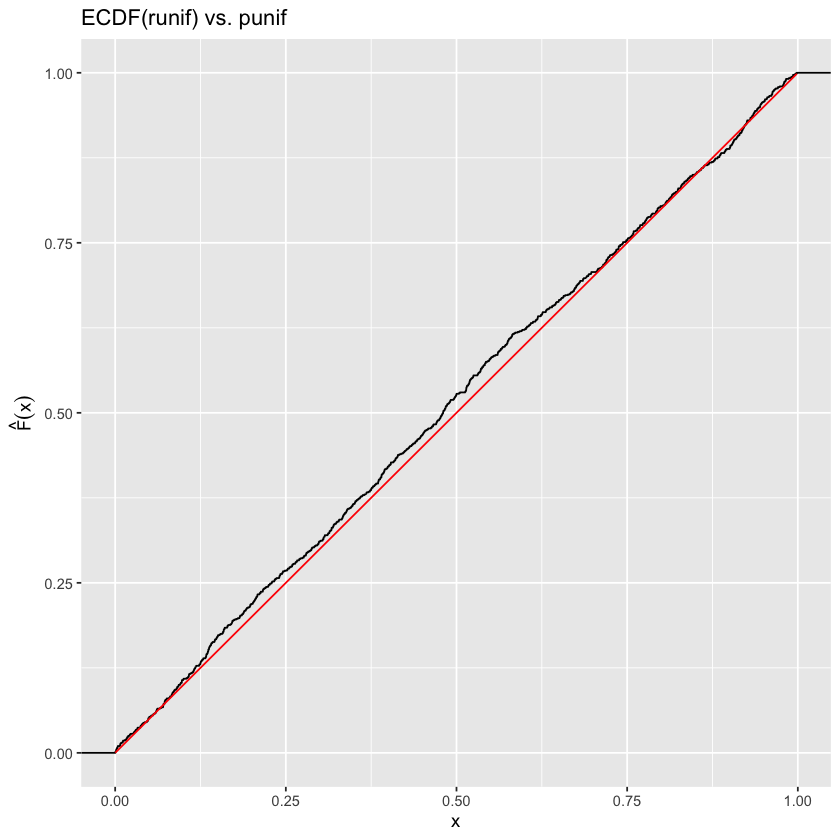

In [5]:
x  <- runif(1000)
df <- data.frame(x = x)

# Panel 1: Histogram + PDF
p1 <- ggplot(df, aes(x = x)) +
  geom_histogram(aes(y = after_stat(density)),
                 bins  = 30,
                 fill  = "blue",
                 alpha = 0.3,
                 color = "black") +
  stat_function(fun  = dunif, color = "red") +
  labs(title = "runif(1000) vs. dunif",
       x     = "x",
       y     = "Density")

# Panel 2: ECDF + CDF
p2 <- ggplot(df, aes(x = x)) +
  stat_ecdf(geom = "step") +
  stat_function(fun  = punif, color = "red") +
  labs(title = "ECDF(runif) vs. punif",
       x     = "x",
       y     = expression(hat(F)(x)))

p1
p2

## Normal

### PDF

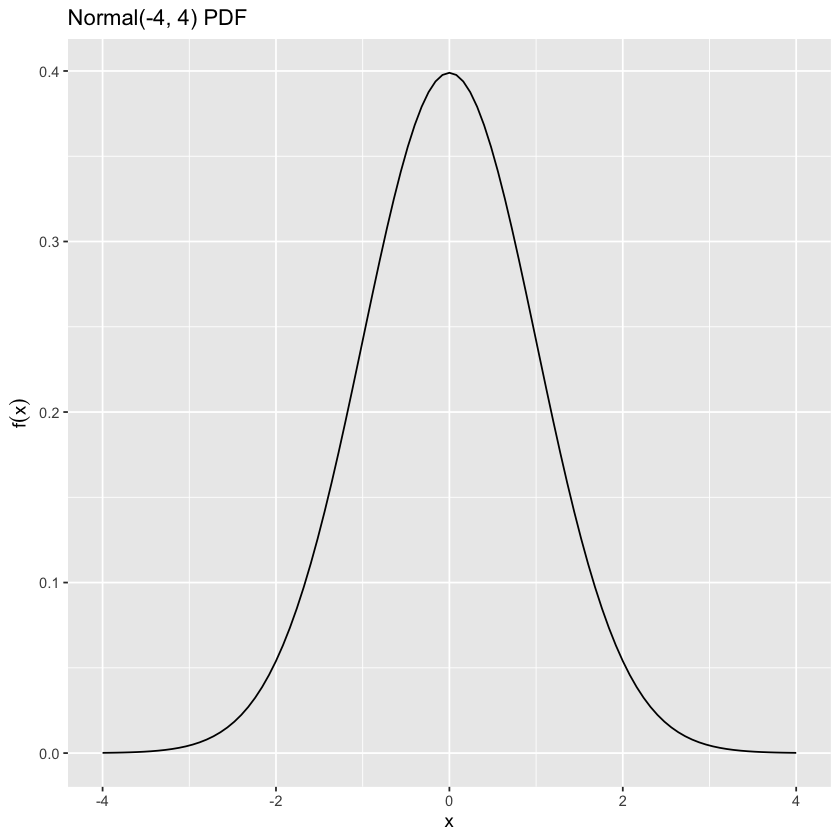

In [6]:
x <- seq(-4, 4, length=100)
df <- data.frame(x = x)

ggplot(df, aes(x = x)) +
  stat_function(fun = dnorm) +
  labs(
    title = "Normal(-4, 4) PDF",
    y     = expression(f(x))
  )

### CDF

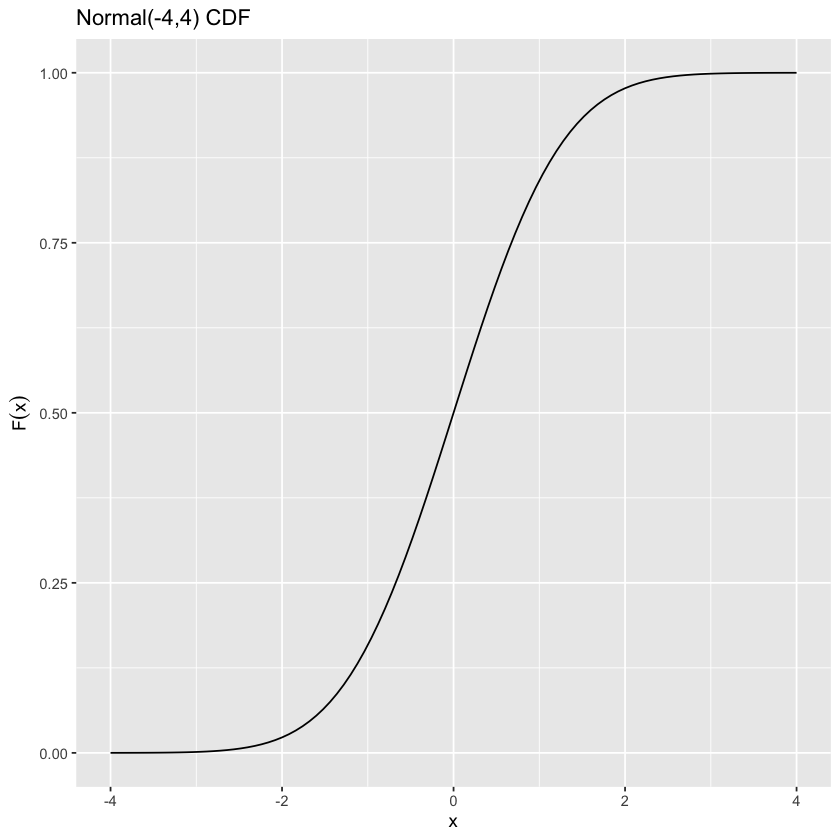

In [7]:
ggplot(df, aes(x = x)) +
  stat_function(fun = pnorm) +
  labs(
    title = "Normal(-4,4) CDF",
    y     = expression(F(x))
  )

### Simulation

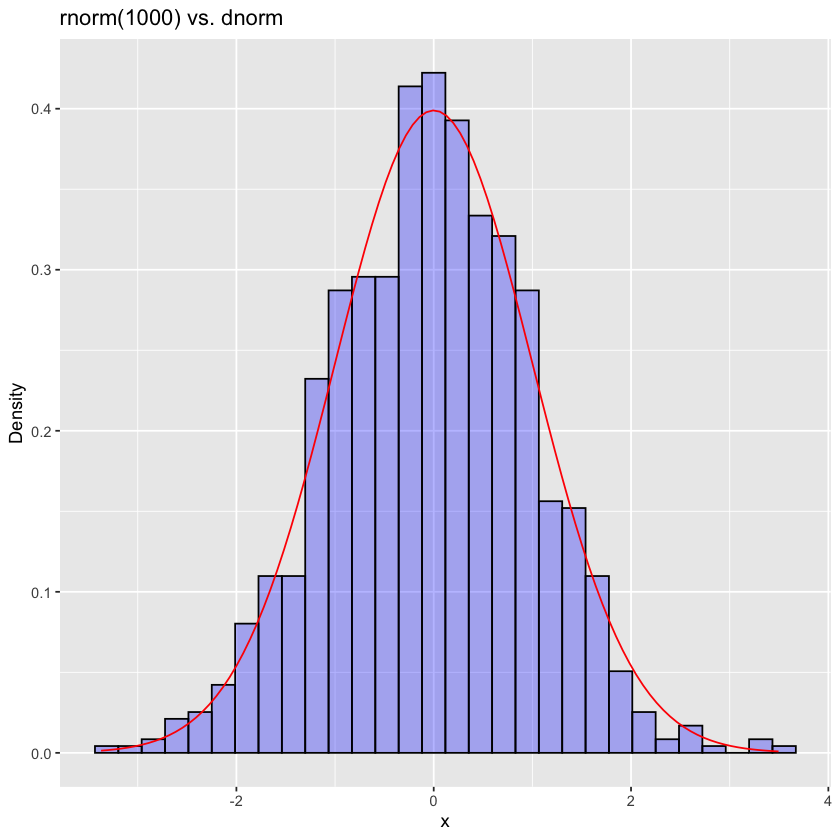

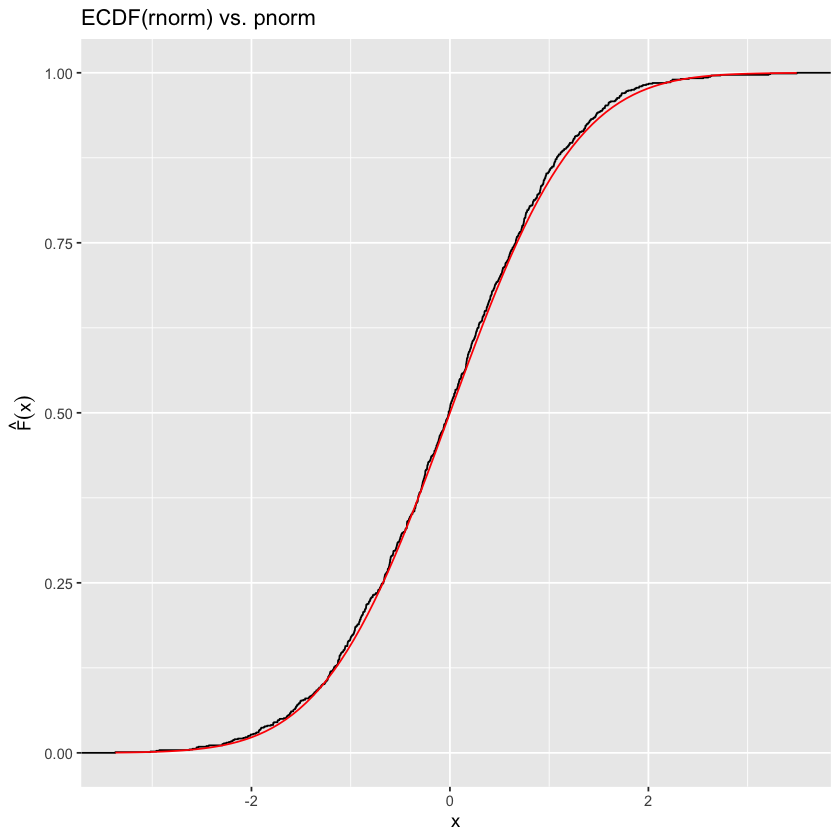

In [8]:
x  <- rnorm(1000)
df <- data.frame(x = x)

# Panel 1: Histogram + PDF
p1 <- ggplot(df, aes(x = x)) +
  geom_histogram(aes(y = after_stat(density)),
                 bins  = 30,
                 fill  = "blue",
                 alpha = 0.3,
                 color = "black") +
  stat_function(fun  = dnorm,
                color = "red") +
  labs(title = "rnorm(1000) vs. dnorm",
       x     = "x",
       y     = "Density")

# Panel 2: ECDF + CDF
p2 <- ggplot(df, aes(x = x)) +
  stat_ecdf(geom = "step") +
  stat_function(fun  = pnorm,
                color = "red") +
  labs(title = "ECDF(rnorm) vs. pnorm",
       x     = "x",
       y     = expression(hat(F)(x)))

p1
p2

## Exponential

### PDF

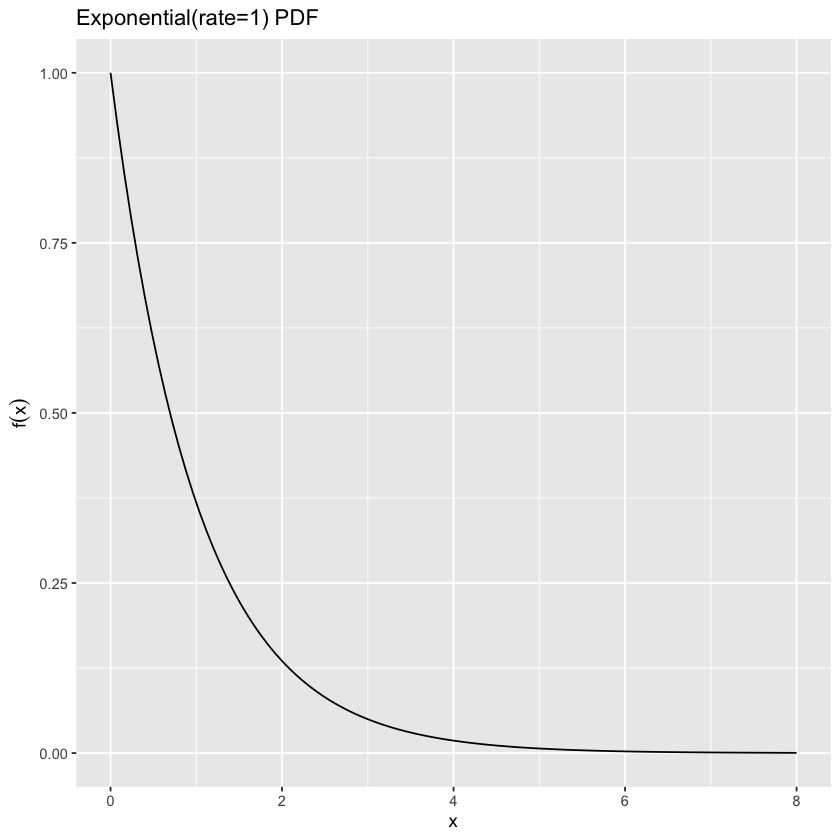

In [9]:
x <- seq(0, 8, length=100)
df <- data.frame(x = x)

# default rate is 1
ggplot(df, aes(x = x)) +
  stat_function(fun = dexp) +
  labs(
    title = "Exponential(rate=1) PDF",
    y     = expression(f(x))
  )

### CDF

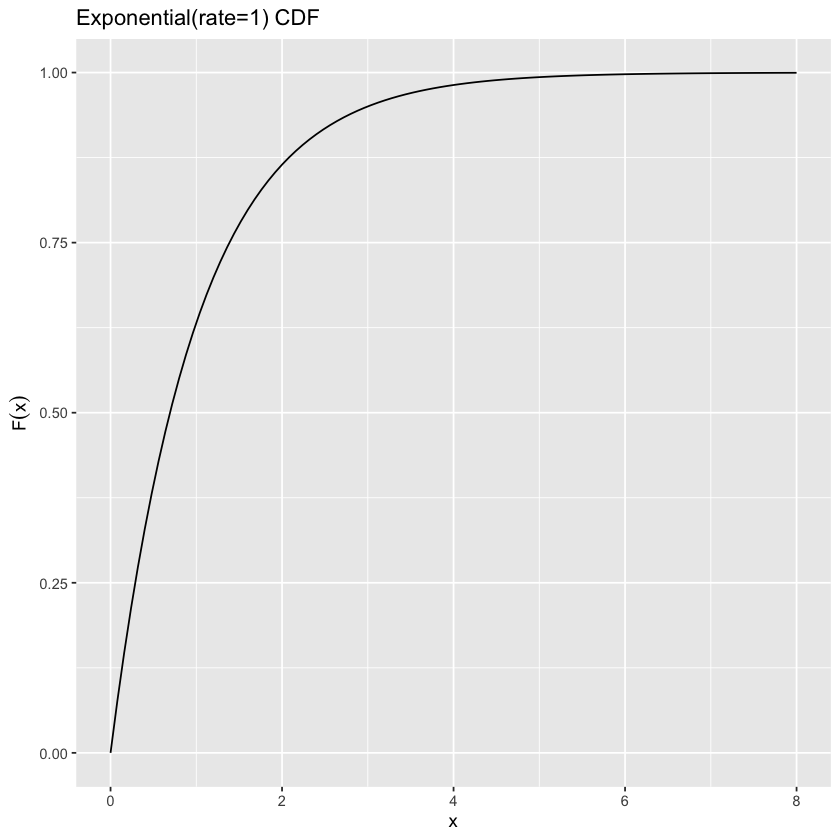

In [10]:
ggplot(df, aes(x = x)) +
  stat_function(fun = pexp) +
  labs(
    title = "Exponential(rate=1) CDF",
    y     = expression(F(x))
  )

### Simulation

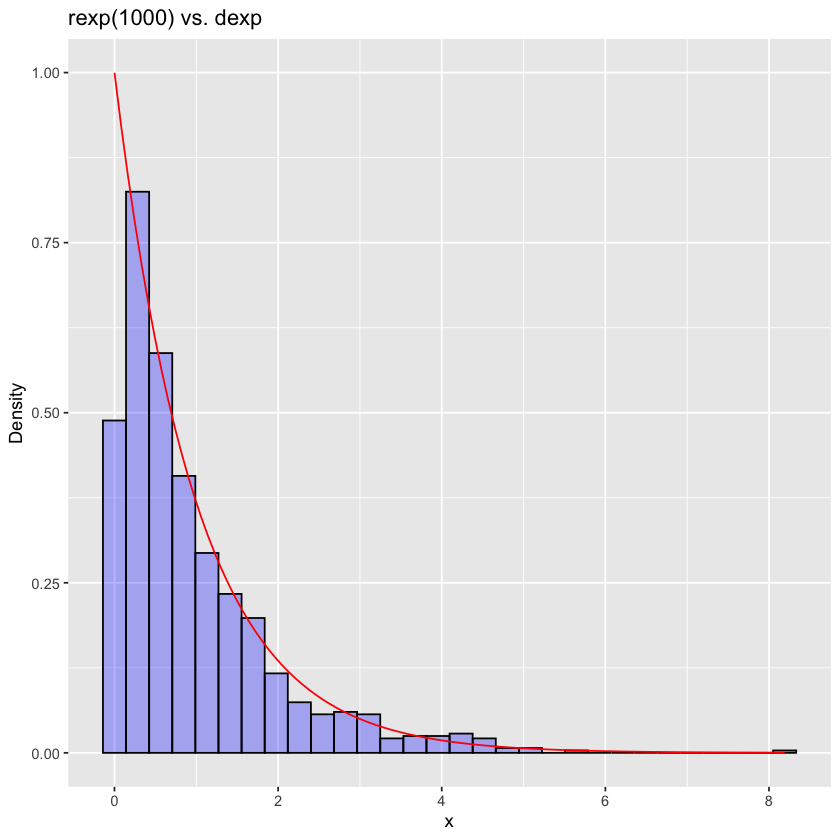

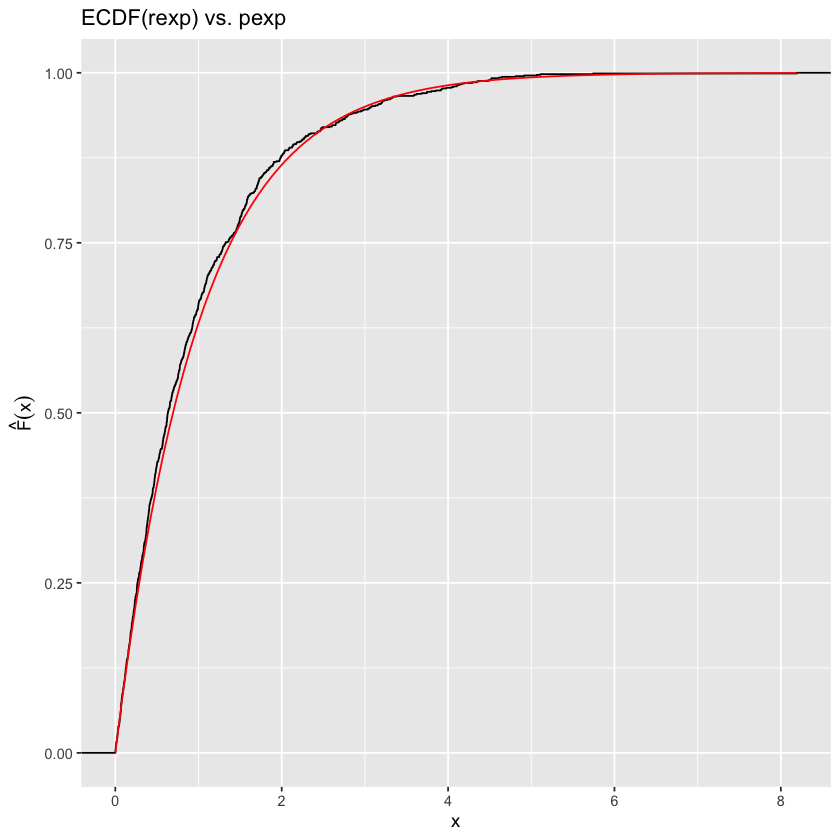

In [11]:
x  <- rexp(1000, rate=1)
df <- data.frame(x = x)

# Panel 1: Histogram + PDF
p1 <- ggplot(df, aes(x = x)) +
  geom_histogram(aes(y = after_stat(density)),
                 bins  = 30,
                 fill  = "blue",
                 alpha = 0.3,
                 color = "black") +
  stat_function(fun  = dexp,
                color = "red") +
  labs(title = "rexp(1000) vs. dexp",
       x     = "x",
       y     = "Density")

# Panel 2: ECDF + CDF
p2 <- ggplot(df, aes(x = x)) +
  stat_ecdf(geom = "step") +
  stat_function(fun  = pexp,
                color = "red") +
  labs(title = "ECDF(rexp) vs. pexp",
       x     = "x",
       y     = expression(hat(F)(x)))

p1
p2

## Universality of the Uniform

a.k.a. integral transform, inverse transform sampling, quantile transformation and fundamental theorem of simulation.

### From Uniform to Logistic

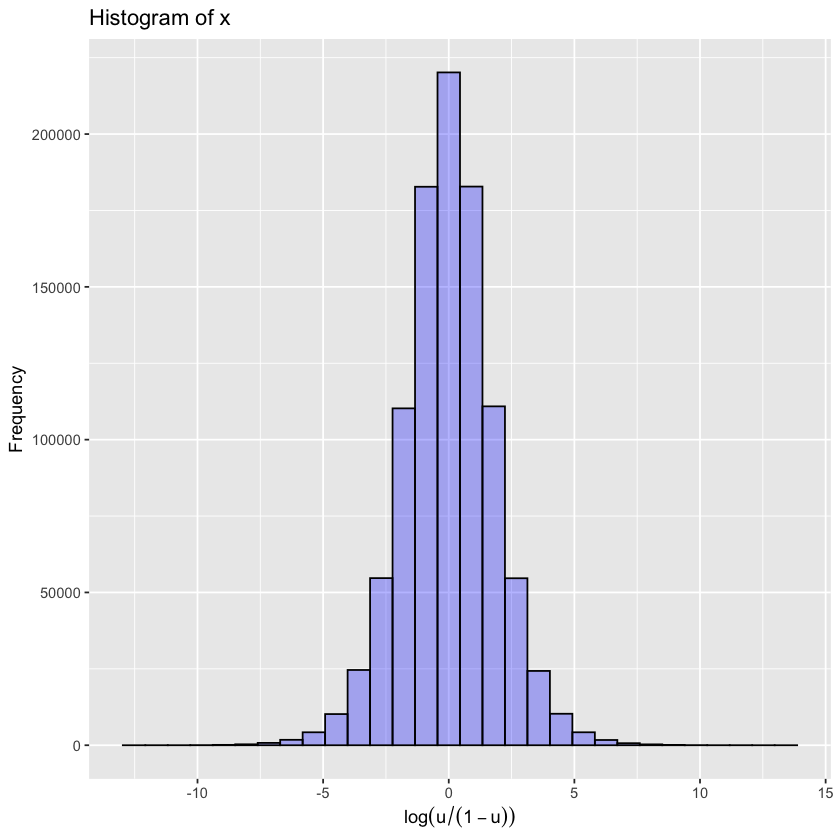

In [12]:
u  <- runif(10^6)
x  <- log(u/(1-u))
df <- data.frame(x = x)

ggplot(df, aes(x = x)) +
  geom_histogram(
    bins  = 30,
    fill  = "blue",
    alpha = 0.3,
    color = "black"
  ) +
  labs(
    title = "Histogram of x",
    x = expression(log(u/(1-u))),
    y     = "Frequency"
  )

### From Uniform to Rayleigh

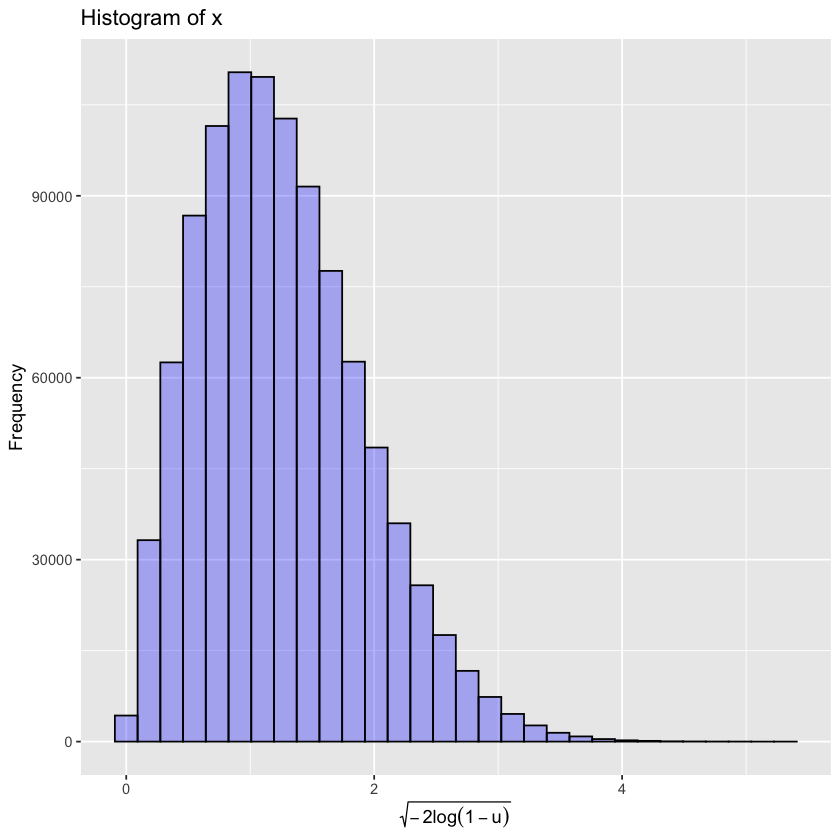

In [13]:
u  <- runif(10^6)
x  <- sqrt(-2*log(1-u))
df <- data.frame(x = x)

ggplot(df, aes(x = x)) +
  geom_histogram(
    bins  = 30,
    fill  = "blue",
    alpha = 0.3,
    color = "black"
  ) +
  labs(
    title = "Histogram of x",
    x = expression(sqrt(-2*log(1-u))),
    y     = "Frequency"
  )

## Poisson process

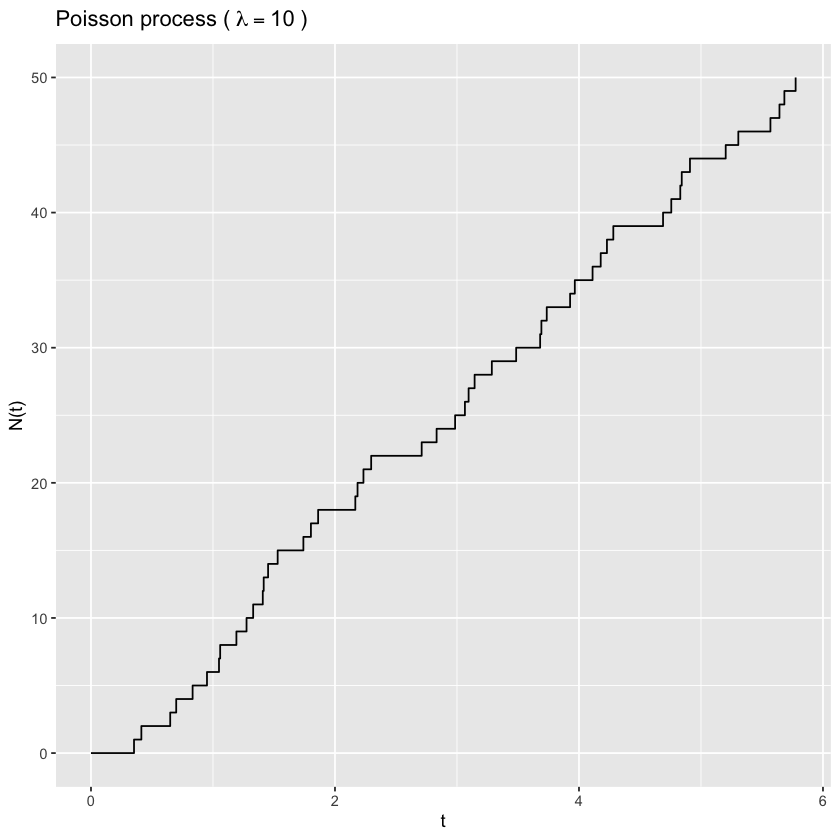

In [14]:
n      <- 50
lambda <- 10

# simulate inter‑arrival times and arrival epochs
x <- rexp(n, rate=lambda)
t <- cumsum(x)

# build the data frame for the counting process
df <- data.frame(
  t = c(0, t),
  N = 0:length(t)
)

# plot as a step function
ggplot(df, aes(x = t, y = N)) +
  geom_step() +
  labs(
    title = bquote("Poisson process (" ~ lambda == .(lambda) ~ ")"),
    x     = "t",
    y     = "N(t)"
  )